# My first script with TensorFlow

We will demonstrate fitting a neural network to a sine function.

In [24]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
b = tf.Variable(tf.zeros((100,)))
W = tf.Variable(tf.random_normal((1,100)))
h = tf.nn.relu(tf.matmul(W, x) + b)

In [10]:
sess = tf.Session()

In [11]:
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


(100, 1) (100, 1)


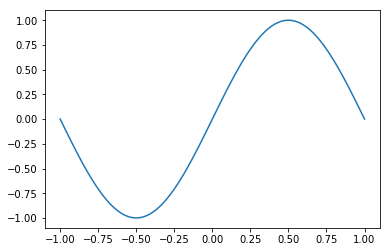

In [72]:
trainx = np.linspace(-1,1,100, dtype=np.float32).reshape((-1,1))
trainy = np.array(np.sin(np.pi*trainx), dtype=np.float32)
plt.plot(trainx, trainy)
print(trainx.shape, trainy.shape)

In [250]:
x = tf.placeholder(tf.float32, (None,1), name='x')
y = tf.placeholder(tf.float32, (None,1), name='y')
n_units = 128

with tf.variable_scope('lreg'):
    w = tf.Variable(tf.random_normal((1,n_units)), name='W')
    b = tf.Variable(tf.random_normal((1,n_units)), name='b')
    prod = tf.matmul(x, w, name='prod') + b
    mid = tf.nn.relu(prod, name='mid')
    w2 = tf.Variable(tf.random_normal((n_units,1)), name='W2')
    b2 = tf.Variable(tf.zeros((1,1)), name='b2')
    y_pred = tf.matmul(mid, w2, name='y_pred') + b2
    loss = tf.reduce_mean(tf.square(y_pred - y))

In [253]:
optimizer = tf.train.AdamOptimizer(0.02).minimize(loss)

In [254]:
init = tf.global_variables_initializer()
use_batch = True
loss_hist = []
with tf.Session() as sess:
    sess.run(init)
    
    feed_dict = {x: trainx.reshape((-1,1)), y: trainy.reshape((-1,1))}
    for n in range(5000):
        if use_batch:
            loss_val, _ = sess.run([loss, optimizer], feed_dict)
        else:
            for i in range(len(trainx)):
                feed_dict = {x: trainx[i].reshape((1,1)), y: trainy[i].reshape((1,1))}
                loss_val, _ = sess.run([loss, optimizer], feed_dict)
        loss_hist.append(loss_val)
        if n % 1000 == 0:
            print('loss[{}]: '.format(n), loss_val.mean())

    y_pred_batch = [sess.run(y_pred, {x: xi.reshape((1,1))})[0][0] for xi in trainx]

loss[0]:  22.2827
loss[1000]:  3.65864e-05
loss[2000]:  2.4613e-05
loss[3000]:  0.000219826
loss[4000]:  1.92804e-05


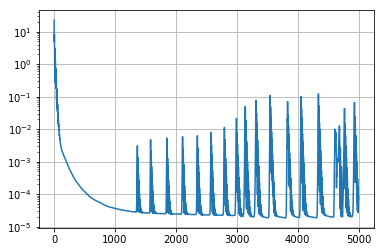

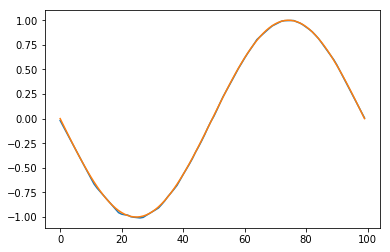

In [255]:
plt.semilogy(loss_hist)
plt.grid()
plt.figure()
plt.plot(np.transpose([y_pred_batch, trainy.reshape((-1))]), '-')